In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

Import the three datasets

In [3]:
df =pd.read_table('F:/AI Course/CSV/Data science with Python 1/movies.txt',sep="::",names= ['MovieID','Title','Genres'])
df.head()

,MovieID,Title,Genres
0,ï»¿1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df.at[0,'MovieID']='1'

In [5]:
df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df1= pd.read_csv('F:/AI Course/CSV/Data science with Python 1/users.dat',sep="::",names= ['UserID','Gender','Age','Occupation','Zip-code'])
df1.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
df2= pd.read_csv('F:/AI Course/CSV/Data science with Python 1/ratings.dat',sep="::",names= ['UserID','MovieID','Rating','Timestamp'])
df2.head()                 

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [8]:
a = pd.merge(df1,df2,on='UserID')
a.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291


In [9]:
df['MovieID'].unique()

array(['1', '2', '3', ..., '3950', '3951', '3952'], dtype=object)

In [10]:
df['MovieID'] = df['MovieID'].astype(str).astype(int)

In [11]:
df['MovieID'].dtype

dtype('int32')

In [12]:
Dataset = pd.merge(df,a,on='MovieID')
Dataset.head()

,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,F,1,10,48067,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,F,50,9,55117,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,M,25,12,11413,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,M,25,17,61614,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,F,35,1,95370,5,978226474


    Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

    User Age Distribution
    User rating of the movie “Toy Story”
    Top 25 movies by viewership rating
    Find the ratings for all the movies reviewed by for a particular user of user id = 2696


In [13]:
Age_Distribution = Dataset['Age'].value_counts()

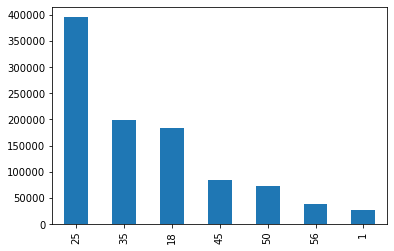

In [14]:
Age_Distribution.plot(kind='bar')

In [15]:
Movie_rating = Dataset[Dataset['Title']=='Toy Story (1995)']['Rating'].value_counts()

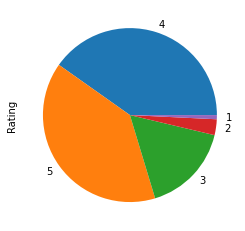

In [16]:
Movie_rating.plot(kind='pie')

In [17]:
Top = Dataset.groupby('Title')['Rating'].mean()
Top

Title
$1,000,000 Duck (1971)                            3.027027
'Night Mother (1986)                              3.371429
'Til There Was You (1997)                         2.692308
'burbs, The (1989)                                2.910891
...And Justice for All (1979)                     3.713568
                                                    ...   
Zed & Two Noughts, A (1985)                       3.413793
Zero Effect (1998)                                3.750831
Zero Kelvin (Kjï¿½rlighetens kjï¿½tere) (1995)    3.500000
Zeus and Roxanne (1997)                           2.521739
eXistenZ (1999)                                   3.256098
Name: Rating, Length: 3706, dtype: float64

In [18]:
Top_25 = Top.sort_values(ascending=False)
sg = Top_25.head(25)
sg

Title
Gate of Heavenly Peace, The (1995)                                     5.000000
Lured (1947)                                                           5.000000
Ulysses (Ulisse) (1954)                                                5.000000
Smashing Time (1967)                                                   5.000000
Follow the Bitch (1998)                                                5.000000
Song of Freedom (1936)                                                 5.000000
Bittersweet Motel (2000)                                               5.000000
Baby, The (1973)                                                       5.000000
One Little Indian (1973)                                               5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

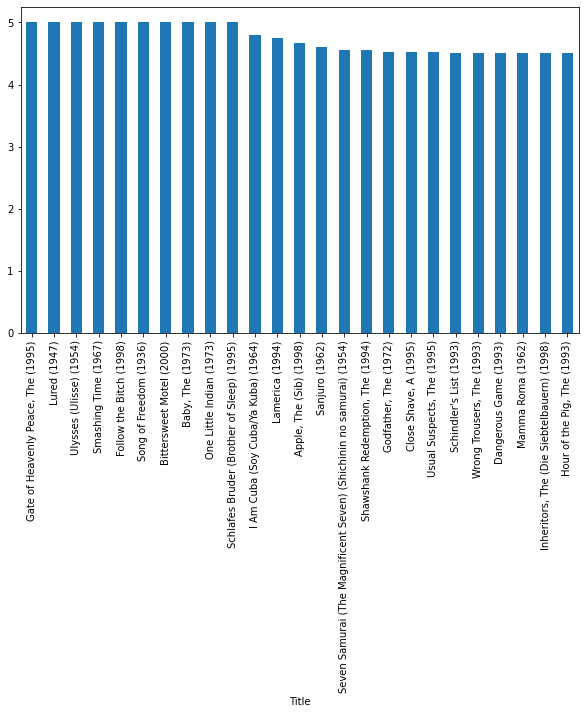

In [19]:
plt.figure(figsize=(10,6))
sg.plot(kind='bar')

In [20]:
groupedby_uid = Dataset.groupby('UserID')

In [21]:
userid_2696 = groupedby_uid.get_group(2696)
userid_2696[['UserID','Rating','Title']]

,UserID,Rating,Title
95261,2696,3,"Client, The (1994)"
200536,2696,5,Lone Star (1996)
270342,2696,4,Basic Instinct (1992)
274576,2696,3,E.T. the Extra-Terrestrial (1982)
349333,2696,4,"Shining, The (1980)"
360382,2696,2,Back to the Future (1985)
448293,2696,3,Cop Land (1997)
457193,2696,4,L.A. Confidential (1997)
459835,2696,4,"Game, The (1997)"
464473,2696,2,I Know What You Did Last Summer (1997)


Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [22]:
Dataset['Genres'].value_counts().tail()

Drama|Romance|Western        29
Children's|Fantasy           27
Comedy|Film-Noir|Thriller     5
Film-Noir|Horror              2
Fantasy                       1
Name: Genres, dtype: int64

Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [23]:
cross = pd.crosstab(Dataset['Title'],Dataset['Genres'])
cross

Genres,Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Comedy,...,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
'Night Mother (1986),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
'Til There Was You (1997),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"'burbs, The (1989)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...And Justice for All (1979),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zero Effect (1998),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zero Kelvin (Kjï¿½rlighetens kjï¿½tere) (1995),2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
Dataset.head(4)

,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,F,1,10,48067,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,F,50,9,55117,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,M,25,12,11413,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,M,25,17,61614,5,978225952


Features affecting Rating of a Movies can be :- Gender,Age & Occupation

In [25]:
First = Dataset[['MovieID','Age','Occupation','Rating']]
First

,MovieID,Age,Occupation,Rating
0,1,1,10,5
1,1,50,9,4
2,1,25,12,4
3,1,25,17,5
4,1,35,1,5
...,...,...,...,...
1000204,3952,25,7,4
1000205,3952,25,1,3
1000206,3952,25,7,4
1000207,3952,35,14,1


Develop an appropriate model to predict the movie ratings

In [26]:
first1000 = First[1000:]

In [27]:
x= first1000.iloc[:,0:3]
y= first1000.iloc[:,-1]

In [28]:
y.value_counts()

4    348573
3    261024
5    225916
2    107527
1     56169
Name: Rating, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Prediction through Logistic Regression


In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()

In [32]:
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
pred = model.predict(X_test)

In [34]:
model.score(X_test,y_test)

0.3482000780616687

In [35]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
print(confusion_matrix(y_test,pred))

[[    0     0    11 11216     0]
 [    0     0    34 21499     0]
 [    0     0    58 52102     0]
 [    0     0    74 69527     0]
 [    0     0    63 45258     0]]


In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     11227
           2       0.00      0.00      0.00     21533
           3       0.24      0.00      0.00     52160
           4       0.35      1.00      0.52     69601
           5       0.00      0.00      0.00     45321

    accuracy                           0.35    199842
   macro avg       0.12      0.20      0.10    199842
weighted avg       0.18      0.35      0.18    199842



In [38]:
print(accuracy_score(y_test,pred))

0.3482000780616687


# Prediction through KNeighbors


In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_jobs=-1)

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1)

In [42]:
pred1 = knn.predict(X_test)
knn.score(X_test,y_test)

0.3341089460673932

In [43]:
metrics.confusion_matrix(y_test,pred1)

array([[ 2118,  2039,  3738,  2640,   692],
       [ 2162,  3625,  7807,  6241,  1698],
       [ 2872,  5925, 18641, 18949,  5773],
       [ 2019,  5142, 21348, 29209, 11883],
       [  775,  1885, 10355, 19130, 13176]], dtype=int64)

In [44]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           1       0.21      0.19      0.20     11227
           2       0.19      0.17      0.18     21533
           3       0.30      0.36      0.33     52160
           4       0.38      0.42      0.40     69601
           5       0.40      0.29      0.34     45321

    accuracy                           0.33    199842
   macro avg       0.30      0.28      0.29    199842
weighted avg       0.34      0.33      0.33    199842



In [45]:
print(accuracy_score(y_test,pred1))

0.3341089460673932
